In [1]:

%pip install protobuf==3.20.3 --upgrade
import pkg_resources
print("protobuf version:", pkg_resources.get_distribution("protobuf").version)


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
protobuf version: 3.20.3


In [2]:
import os
import glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

IMG_SIZE = 224

In [3]:
# -------------------------
# SINGLE IMAGE (your earlier pipeline)
# -------------------------
single_image_path = r"D:\VIT\images\beagle_120.jpg"

img = load_img(single_image_path)          # PIL image
img_np = img_to_array(img)                 # H,W,3 float32
print("Original shape:", img_np.shape)
show("1. Original Image", img_np)

img_tensor = tf.convert_to_tensor(img_np, dtype=tf.float32)

# Resize
IMG_SIZE = 224
resized = tf.image.resize(img_tensor, (IMG_SIZE, IMG_SIZE))
show("2. After Resize", resized)

# Normalize 0..1
normalized = resized / 255.0
show("3. After Normalize (0-1)", normalized)

# Grayscale
grayscale = tf.image.rgb_to_grayscale(resized)
show("4. Grayscale", grayscale)

# Gaussian blur
blur_kernel = tf.constant([[1,2,1],[2,4,2],[1,2,1]], dtype=tf.float32)
blur_kernel = blur_kernel / tf.reduce_sum(blur_kernel)
blur_kernel = blur_kernel[:, :, tf.newaxis, tf.newaxis]
grayscale4d = grayscale[tf.newaxis, ...]
blurred = tf.nn.conv2d(grayscale4d, blur_kernel, strides=1, padding="SAME")
blurred = tf.squeeze(blurred)
show("5. Gaussian Blurred", blurred)


print("\n✔️ ALL PREPROCESSING DONE FOR SINGLE IMAGE\n")


Original shape: (500, 333, 3)


NameError: name 'show' is not defined

Original shape: (500, 333, 3)


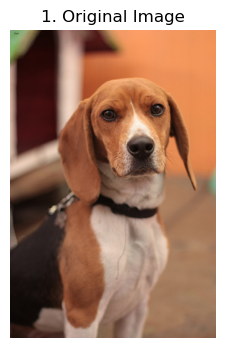

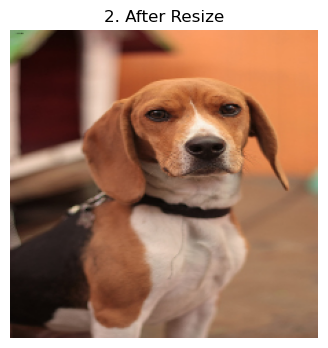

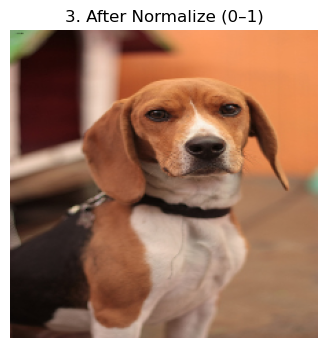

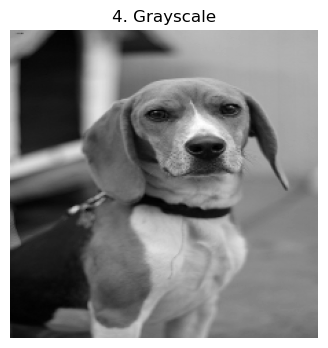

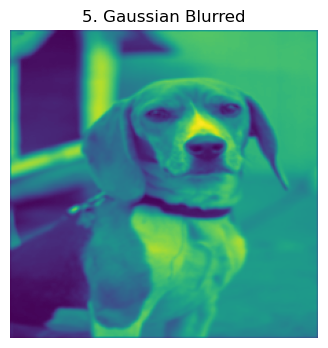


✔️ ALL PREPROCESSING DONE FOR SINGLE IMAGE



In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# -------------------------
# Helper function to show images
# -------------------------
def show(title, image):
    plt.figure(figsize=(4, 4))
    
    # If tensor → numpy
    if isinstance(image, tf.Tensor):
        image = image.numpy()
    
    # Handle grayscale images
    if image.ndim == 3 and image.shape[-1] == 1:
        plt.imshow(image.squeeze(), cmap="gray")
    else:
        plt.imshow(image.astype("uint8") if image.max() > 1 else image)
    
    plt.title(title)
    plt.axis("off")
    plt.show()

# -------------------------
# SINGLE IMAGE PIPELINE
# -------------------------
single_image_path = r"D:\VIT\images\beagle_120.jpg"

# 1. Load image
img = load_img(single_image_path)
img_np = img_to_array(img)   # (H, W, 3)
print("Original shape:", img_np.shape)
show("1. Original Image", img_np)

# Convert to tensor
img_tensor = tf.convert_to_tensor(img_np, dtype=tf.float32)

# 2. Resize
IMG_SIZE = 224
resized = tf.image.resize(img_tensor, (IMG_SIZE, IMG_SIZE))
show("2. After Resize", resized)

# 3. Normalize (0–1)
normalized = resized / 255.0
show("3. After Normalize (0–1)", normalized)

# 4. Grayscale
grayscale = tf.image.rgb_to_grayscale(resized)
show("4. Grayscale", grayscale)

# 5. Gaussian Blur
blur_kernel = tf.constant([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]], dtype=tf.float32)
blur_kernel = blur_kernel / tf.reduce_sum(blur_kernel)
blur_kernel = blur_kernel[:, :, tf.newaxis, tf.newaxis]

grayscale_4d = grayscale[tf.newaxis, ...]  # (1, H, W, 1)
blurred = tf.nn.conv2d(grayscale_4d, blur_kernel, strides=1, padding="SAME")
blurred = tf.squeeze(blurred)

show("5. Gaussian Blurred", blurred)

print("\n✔️ ALL PREPROCESSING DONE FOR SINGLE IMAGE\n")


Total images found: 7390


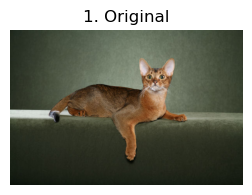

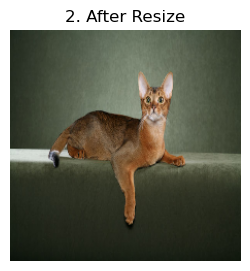

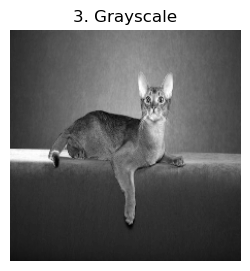

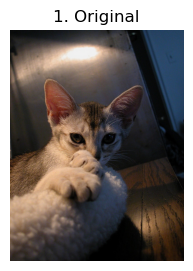

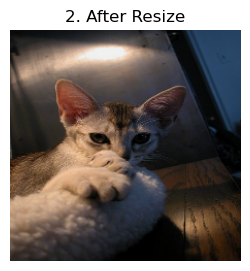

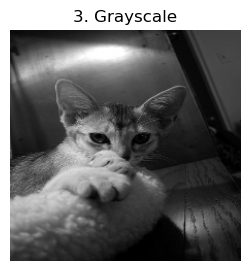

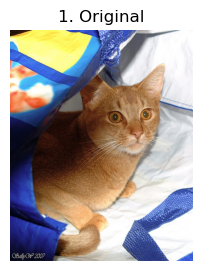

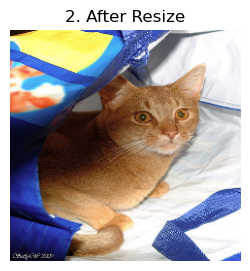

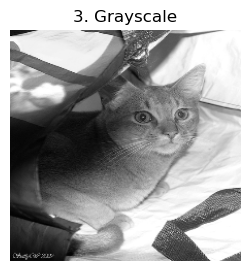

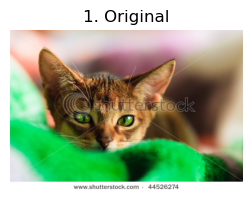

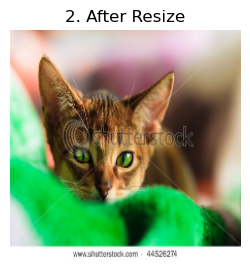

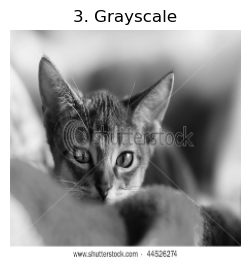


✔️ BULK IMAGE PREPROCESSING DONE



In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# -------------------------
# Helper function
# -------------------------
def show(title, image):
    plt.figure(figsize=(3,3))
    if isinstance(image, tf.Tensor):
        image = image.numpy()
    if image.ndim == 3 and image.shape[-1] == 1:
        plt.imshow(image.squeeze(), cmap="gray")
    else:
        plt.imshow(image.astype("uint8") if image.max() > 1 else image)
    plt.title(title)
    plt.axis("off")
    plt.show()

# -------------------------
# Load images manually
# -------------------------
DATASET_PATH = r"D:\VIT\images"
IMG_SIZE = 224

image_files = [
    os.path.join(DATASET_PATH, f)
    for f in os.listdir(DATASET_PATH)
    if f.lower().endswith(('.jpg', '.png', '.jpeg'))
]

print("Total images found:", len(image_files))

# -------------------------
# Process each image
# -------------------------
for img_path in image_files[:4]:   # show first 4 images
    img = load_img(img_path)
    img_arr = img_to_array(img)

    show("1. Original", img_arr)

    resized = tf.image.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    show("2. After Resize", resized)

    grayscale = tf.image.rgb_to_grayscale(resized)
    show("3. Grayscale", grayscale)

print("\n✔️ BULK IMAGE PREPROCESSING DONE\n")
